# How exactly does a teams performance at the plate effect winning?

This analysis is on the data made available through <a href = http://www.seanlahman.com/baseball-archive/statistics/>Laman's Baseball Database</a>. This is a comprehensive database of baseball statistics for Major League Baseball from 1871 through 2015. 
***

# Question 1: In the history of baseball, who are the top 10 players of the past 20 years in Batting Average and On Base Percentage? (Minimum 200 At Bats)

Who doesn't like a leaderboard. Some of the best players in baseball history have had historic seasons. We'd like to define who they are for two of the most intriguing categories of them all. Average. On Base Percentage. We want to know who are the Kings of Kings.

***

# Question 2: Since the year 2000, what metric directly relates to a team's winning percentage: Getting a hit (Avg) or Getting on base (OBP)?

Billy Beane, a General Manager of the Oakland Athletics in the 1990's had an approach that went against what a lot of conventional wisdom suggested. He didn't care if a player batter .214 (Meaning out of 1000 times that a player went to the plate and did not walk, he got a hit 214 times), or if the player batted .301. What mattered to Billy Beane was that the player got on base. Walks. Hits. Getting hit by pitch. What mattered to him wasn't if the player got a hit, rather how he would end up touching first base, or better safely. 

This idea, while not exclusive, was the crux of why many industry experts considered Billy Beane to be wrong, and even question his sanity. Billy Beane however found tremendous success with this method. To this day, it's debated amongst the baseball community.

***

# Question 3: Since the beginning of baseball history, does a team's ability to hit homeruns translate into victories?

Everyone who enjoys baseball, enjoys a great homerun. They are exciting, and bring energy to the game. We are enjoying in 2017 one of the most explosive seasons for homeruns in quite some time. Logically, it would make sense to assume that a team that hits more homeruns, will win more often. They hit a homerun, they will have more runs scored, and therefore be more likely to 
win a game. However, I don't believe it is that simple. There are multiple facets to a player's game, and I believe that too great a reliance on the homerun, will harm a team's chances to win. I'd like to investigate this idea.

***

### Disclosures

#### Data for this analysis

I will utilize the following data sets for this analysis.

- Teams.csv
- Batting.csv
- Master.csv

#### Defining Baseball Offensive Statistics

$$ Win\hspace{.1cm}Percentage = \frac{Wins}{Wins + Losses} $$

$$ \begin{align} Average = \frac{Hits}{At\hspace{.1cm}Bats}\end{align} $$


$$ On\hspace{.1cm}Base\hspace{.1cm}Percentage = \frac{Hits + Walks + Hit\hspace{.1cm}by\hspace{.1cm}Pitch}{At\hspace{.1cm}Bats + Walks + Hit\hspace{.1cm}by\hspace{.1cm}Pitch + Sacrifice\hspace{.1cm}Flies} $$

***

## Initiating Analysis

#### Import Modules

In [1]:
#Importing Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Obtain Data

In [2]:
teams = pd.read_csv('teams.csv')
teams_since_2000 = teams.loc[teams.yearID >= 2000]
batters = pd.read_csv('batting.csv')
batters_last_20_years = batters.loc[batters.yearID >= 1997]
master = pd.read_csv('master.csv')

#### Creating Functions for the analysis

In [3]:
# Function used to add Average, and Win % to the end of the dataset based on data in that file. This function is created
# in case further analysis down the road needs to utilize these columns. The second function does the same, but is made
# to simply the input for sheets that dont need win %

def add_column(dataset):
    dataset.insert(len(dataset.columns), 'AVG',(dataset['H'] / dataset['AB']))
    dataset.insert(len(dataset.columns), 'W%',(dataset['W'] / (dataset['W'] + dataset['L'])))
    dataset.insert(len(dataset.columns), 'OBP',((dataset['H'] + dataset['BB'] + dataset['HBP']) / (dataset['AB'] + dataset['BB'] + dataset['HBP'] + dataset['SF'])))
    

def add_column_avg_obp(dataset): # Creates a function to only add AVG and OBP
    dataset.insert(len(dataset.columns), 'AVG',(dataset['H'] / dataset['AB']))
    dataset.insert(len(dataset.columns), 'OBP',((dataset['H'] + dataset['BB'] + dataset['HBP']) / (dataset['AB'] + dataset['BB'] + dataset['HBP'] + dataset['SF'])))
    

***

# Question 1: In the history of baseball, who are the top 10 players of the past 20 years in Batting Average and On Base Percentage? (Minimum 200 At Bats)

## Wrangling Data

#### There is no Average Column in our data, so we must manually add this into our dataset.

In [4]:
# Insert Average, and OBP for our dataset
add_column_avg_obp(batters_last_20_years)

#### We need to confirm we have no missing data in our dataset.

In [5]:
#Ensure no missing data in dataset for Question #3
batters_last_20_years.isnull().values.any()

True

#### Next we need to see what is missing.

In [6]:
#Evaluate the columns to see what is coming up null, to see if it will affect our analysis
batters_last_20_years.loc[:, batters_last_20_years.isnull().any()].head()

,AVG,OBP
75393,0.263158,0.263158
75394,0.273810,0.314607
75395,0.250000,0.328571
75396,0.000000,0.000000
75397,NaN,NaN


#### It appears we have values for average that are showing up as NaN. This means we have batters in our file that did not have an At Bat classified in the league. We can proceed in deleting these entries, as we only want to consider batters who have at least 200 at bats. 

#### Remove all batters that do not meet the criteria of at least 200 At bats

In [7]:
#Remove all batters that do not meet the criteria of at least 200 At Bats
batters_200_plus_ab = batters_last_20_years.drop(batters_last_20_years[batters_last_20_years.AB < 200].index)

#### Re-Test to see if there is any missing data in the cleaned up version of our dataset

In [8]:
#Evaluate the columns to see what is coming up null, to see if it will affect our analysis
batters_200_plus_ab.loc[:, batters_last_20_years.isnull().any()].head()

,AVG,OBP
75394,0.273810,0.314607
75407,0.314672,0.390863
75408,0.252577,0.374732
75409,0.254743,0.340376
75411,0.332524,0.389610


#### Finally, let's confirm we do in fact have all the columns needed to answer our question.

In [9]:
# Confirm our columns are in place to answer our question
batters_200_plus_ab.loc[:, [('playerID'), ('OBP'), ('AVG'),]].head()

,playerID,OBP,AVG
75394,abbotku01,0.314607,0.273810
75407,alfoned01,0.390863,0.314672
75408,alicelu01,0.374732,0.252577
75409,allenje01,0.340376,0.254743
75411,alomaro01,0.389610,0.332524


***

## Exploration

#### This is a 2 part exploration. First, we will look at the top 10 players of all time in Batting Average. 

In [10]:
# Assign a variable to sort the batters_200_plus_ab dataset by Average Vertically, and descending. Prints top 10 rows.
top_ten_avg = batters_200_plus_ab.sort_values('AVG', axis = 0, ascending = False).head(10) 

# Set the index to playerID, to allow us to order and place data based on that entry. We need this to locate player names.
top_ten_avg.set_index('playerID', inplace=True)

# Display the dataset with the information we need to eliminate unnecessary information.
top_ten_avg.loc[:,[('yearID'),('AVG')]]


,yearID,AVG
playerID,,
walkela01,1999,0.378995
heltoto01,2000,0.372414
garcino01,2000,0.372401
suzukic01,2004,0.372159
gwynnto01,1997,0.371622
bondsba01,2002,0.369727
walkela01,1997,0.366197
mauerjo01,2009,0.365201
jonesch06,2008,0.364465


#### Next, we will look at the top 10 players all time in On Base Percentage.

In [11]:
# Assign a variable to sort the batters_200_plus_ab dataset by Average Vertically, and descending. Prints top 10 rows.
top_ten_obp = batters_200_plus_ab.sort_values('OBP', axis = 0, ascending = False).head(10)

# Set the index to playerID, to allow us to order and place data based on that entry. We need this to locate player names.
top_ten_obp.set_index('playerID', inplace=True)

# Display the dataset with the information we need to eliminate unnecessary information.
top_ten_obp.loc[:,[('yearID'),('OBP')]]

,yearID,OBP
playerID,,
bondsba01,2004,0.609400
bondsba01,2002,0.581699
bondsba01,2003,0.529091
bondsba01,2001,0.515060
mcgwima01,2000,0.482866
bondsba01,2007,0.480084
giambja01,2001,0.476900
giambja01,2000,0.475904
vottojo01,2012,0.473684


#### We technically have our values. However, the purpose of this question wasn't to determine what the top 10 batting averages, and top 10 on base percentages were. We want to know the players that did it. To do this, we need to use the master dataset to properly bring the two datasets together. We will start by creating a column for a players full name.

In [12]:
# First, let's create a Name column.
master['name'] = master['nameFirst'] + ' ' + master['nameLast']

#### Next, we need to make sure we're indexing by playerID as well on master dataset. The reasoning behind this is to ensure that both datasets are indexed on the value that we need to effectively translate, or replace if you will, with the newly created name column. 

In [13]:
# Index the column player_ID to use that to mix organize the data.

master.set_index('playerID', inplace=True)

#### We will now create the new variable that includes a combination of both the top_ten_avg dataset, and the master dataset. The master dataset is specifically noted to combine based off the index of our top_ten_avg dataset. Since both of them index off playerID, this will ensure each party gets placed in the appropriate location in the concatenated dataset.

In [14]:
# This creates a new variable, concatenating the top_ten_avg dataset, and the master dataset, indexed on playerID.
top_ten_avg_byName = pd.concat([top_ten_avg, master.loc[top_ten_avg.index]], axis = 1)

#### Finally, we can print our newly created dataset, that lists specifically the values that matter for our analysis. We now have the top 10 players in MLB history by Average.

In [15]:
# Display the dataset with the information we need to eliminate unnecessary information.
top_ten_avg_byName.loc[:,[('name'),('yearID'),('AVG')]]

,name,yearID,AVG
playerID,,,
walkela01,Larry Walker,1999,0.378995
heltoto01,Todd Helton,2000,0.372414
garcino01,Nomar Garciaparra,2000,0.372401
suzukic01,Ichiro Suzuki,2004,0.372159
gwynnto01,Tony Gwynn,1997,0.371622
bondsba01,Barry Bonds,2002,0.369727
walkela01,Larry Walker,1997,0.366197
mauerjo01,Joe Mauer,2009,0.365201
jonesch06,Chipper Jones,2008,0.364465


#### Now for the On Base Percentage. Fortunately, most of the legwork is done. We will just need to concatenate a new dataset, with the primary focus being on base percentage. So we will utilize the dataset top_ten_obp to accomplish this.

In [16]:
# This creates a new variable, concatenating the top_ten_obp dataset, and the master dataset, indexed on playerID.
top_ten_obp_byName = pd.concat([top_ten_obp, master.loc[top_ten_obp.index]], axis = 1)

#### Once created, we can print our newly created dataset that specifically lists the values that matter for our analysis. We now have the top 10 players in MLB history by OBP.

In [17]:
# Display the dataset with the information we need to eliminate unnecessary information.
top_ten_obp_byName.loc[:,[('name'),('yearID'),('OBP')]]

,name,yearID,OBP
playerID,,,
bondsba01,Barry Bonds,2004,0.609400
bondsba01,Barry Bonds,2002,0.581699
bondsba01,Barry Bonds,2003,0.529091
bondsba01,Barry Bonds,2001,0.515060
mcgwima01,Mark McGwire,2000,0.482866
bondsba01,Barry Bonds,2007,0.480084
giambja01,Jason Giambi,2001,0.476900
giambja01,Jason Giambi,2000,0.475904
vottojo01,Joey Votto,2012,0.473684


## Question 1 Answer - In the history of baseball, who are the top 10 players of the past 20 years in Batting Average and On Base Percentage? (Minimum 200 At Bats)?

#### For batters, we have a wide variety of players. Larry Walker is absolutely one of the best all time, appearing on this list 3 times, in various seasons. An intriguing note is that only Barry Bonds appears on both lists. In OBP, there is no question that Barry Bonds is king. In 2004, he reached base an astounding 60% of the time. 

***

# Question 2: Since the year 2000, what metric directly relates to a team's winning percentage: Getting a hit (Avg) or Getting on base (OBP)?



## Data Wrangling

#### First, we need to make sure that there is no missing information. We need to do this to ensure we have accurate, consistent population data for this evaluation.

In [18]:
#Ensure no missing data in dataset for Questions #1
teams_since_2000.isnull().values.any()

False

#### The result confirms there are no missing values in our dataset.

***

## Exploration

#### The data we have doesn't have OBP Calculated. To answer our question, we need OBP, and Average, as well as winning percentage. We will call a function to add both average and win %, and OBP columns.

In [19]:
#Calling the add_column function to add average and win % columns to dataframes for both Question 1
add_column(teams_since_2000)


#### Next, we want to confirm that our columns are in fact present for this analysis to ensure the operations were successful. 

In [20]:
#Display teams_since_2000 to confirm all columns needed for analysis are present
teams_since_2000.loc[:, [('yearID'), ('OBP'), ('AVG'), ('W%')]].head()

,yearID,OBP,AVG,W%
2325,2000,0.352355,0.279673,0.506173
2326,2000,0.333387,0.265243,0.524691
2327,2000,0.346477,0.271452,0.586420
2328,2000,0.340580,0.271761,0.456790
2329,2000,0.340547,0.266963,0.524691


#### We want to find out what better relates to the team's winning percentage, Average or On Base Percentage. To determine this, we will investigate a correlation coefficient to allow us to evaluate how effective each metric relates to winning percentage. We will be using a linear regression table to compare and contrast.

The Correlation of Average to Winning Percentage from 2000 to present is
0.368634703734
----------------------------------------------------------------------------
The Correlation of On Base Percentage to Winning Percentage from 2000 to present is
0.487284102017


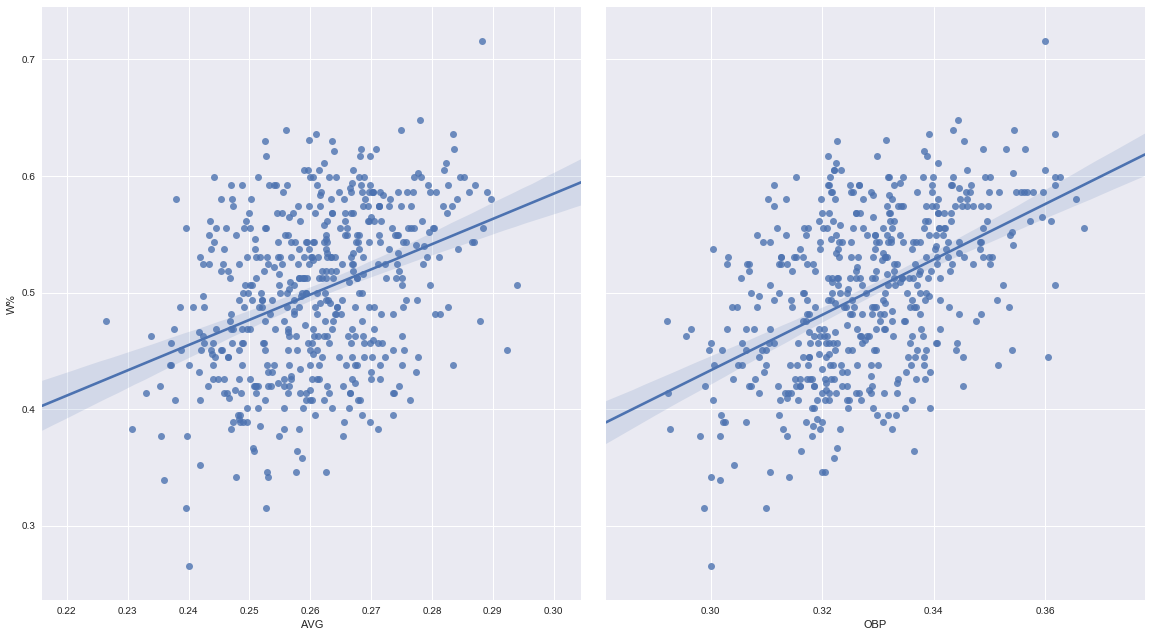

In [21]:
#Create a visual aid for the findings - Correlation between Average and Winning Percentage
sns.pairplot(teams_since_2000, x_vars = ['AVG', 'OBP'], y_vars = 'W%', size = 9, aspect = .9, kind = 'reg')
#Compare the Correlation Coefficient for Average vs. OBP correlated to wins
print('The Correlation of Average to Winning Percentage from 2000 to present is')
print(teams_since_2000['AVG'].corr(teams_since_2000['W%'])) # Clean Display

print('----------------------------------------------------------------------------') # Clean Display

print('The Correlation of On Base Percentage to Winning Percentage from 2000 to present is') # Clean Display
print(teams_since_2000['OBP'].corr(teams_since_2000['W%'])) # Display the correlation of each value
 

## Question 2 Answer - Since the year 2000, what metric directly relates to a team's ability to win a game: Getting a hit (Avg) or Getting on base (OBP)?

#### After evaluating the correlation coefficient, we can state there is a moderate relationship between a Baseball Team's On-Base Percentage, and Winning Percentage in Major League Baseball since 2000. We can also state there is a weak to moderate relationship between a Baseball Team's Batting Average and Winning Percentage in Major League Baseball since 2000. 

#### While neither of these outcomes prove that one causes the other (Correlation does not mean causation), we can infer that On Base Percentage does affect winning percentage more than Batting Average does as a team. This warrants further investigation to determine what further metrics could be utilized for win prediction.

***


# Question 3: Since the beginning of baseball history, does a team's ability to hit homeruns translate into victories?      

## Data Wrangling

#### The only columns we truly need to answer Question 2 is Homeruns (H), and (Wins), and the related Years. While the other statistics have value in further analysis, they will have no bearing in this analysis. We will first need to ensure we have no missing values in these columns.

In [22]:
#Ensure no missing data in dataset for Question #2
teams.isnull().values.any()

True

#### The output confirms we do in fact have missing information. Next, let's check to see where the missing values are.

In [23]:
#Evaluate the columns to see what is coming up null, to see if it will affect our analysis
teams.loc[:, teams.isnull().any()].head()

,lgID,divID,Ghome,DivWin,WCWin,LgWin,WSWin,SO,SB,CS,HBP,SF,DP,park,attendance
0,NaN,NaN,NaN,NaN,NaN,N,NaN,19.0,73.0,NaN,NaN,NaN,NaN,South End Grounds I,NaN
1,NaN,NaN,NaN,NaN,NaN,N,NaN,22.0,69.0,NaN,NaN,NaN,NaN,Union Base-Ball Grounds,NaN
2,NaN,NaN,NaN,NaN,NaN,N,NaN,25.0,18.0,NaN,NaN,NaN,NaN,National Association Grounds,NaN
3,NaN,NaN,NaN,NaN,NaN,N,NaN,9.0,16.0,NaN,NaN,NaN,NaN,Hamilton Field,NaN
4,NaN,NaN,NaN,NaN,NaN,N,NaN,15.0,46.0,NaN,NaN,NaN,NaN,Union Grounds (Brooklyn),NaN


In [24]:
#Evaluate the last five columns to see what is coming up null, to see if it will affect our analysis
teams.loc[:, teams.isnull().any()].tail()

,lgID,divID,Ghome,DivWin,WCWin,LgWin,WSWin,SO,SB,CS,HBP,SF,DP,park,attendance
2830,NL,C,81.0,N,N,N,N,1318.0,35.0,26.0,70.0,41.0,169.0,Busch Stadium III,3444490.0
2831,AL,E,81.0,N,N,N,N,1482.0,60.0,37.0,69.0,28.0,129.0,Tropicana Field,1286163.0
2832,AL,W,81.0,Y,N,N,N,1220.0,99.0,36.0,70.0,40.0,190.0,Rangers Ballpark in Arlington,2710402.0
2833,AL,E,81.0,N,Y,N,N,1362.0,54.0,24.0,55.0,40.0,144.0,Rogers Centre,3392099.0
2834,NL,E,81.0,Y,N,N,N,1252.0,121.0,39.0,64.0,63.0,142.0,Nationals Park,2481938.0


#### Since this spans over 100 years, it was important to check both the front and back of this data set, as different statistics were kept then, compared to now. This confirms that they are in fact the same columns missing information. 

#### Evaluating the data, it appears the null data refers to irrelevant statistics to our analysis. None of these are Total wins (W), or Homeruns (HR), or Year (yearID). None of these statistics are relevant to our data analysis, and we can move forward without needing a solution as to how to handle this information. 

#### We will simply remove all these categories missing information.

In [25]:
#Remove any columns with NA or No data, and test again to ensure no missing data in dataset for Question #2
teams = teams.dropna(axis = 1, how ='any')
teams.isnull().values.any()

False

#### After removing the categories, we confirm that there are no more null values. We want to display the first 5, and last 5 columns to confirm all years have been captured.

In [26]:
#Display teams to confirm all columns needed for analysis are present
teams.loc[:,[('yearID'),('W'), ('HR')]].head()

,yearID,W,HR
0,1871,20,3
1,1871,19,10
2,1871,10,7
3,1871,7,2
4,1871,16,1


In [27]:
#Display teams to confirm all columns needed for analysis are present
teams.loc[:,[('yearID'),('W'),('HR')]].tail()

,yearID,W,HR
2830,2016,86,225
2831,2016,68,216
2832,2016,95,215
2833,2016,89,221
2834,2016,95,203


***

## Exploration

#### Now we will calculate the correlation between the Homeruns, Wins. Due to having a tremendous amount of data points, we will use a hexplot to help us visualize the affect.

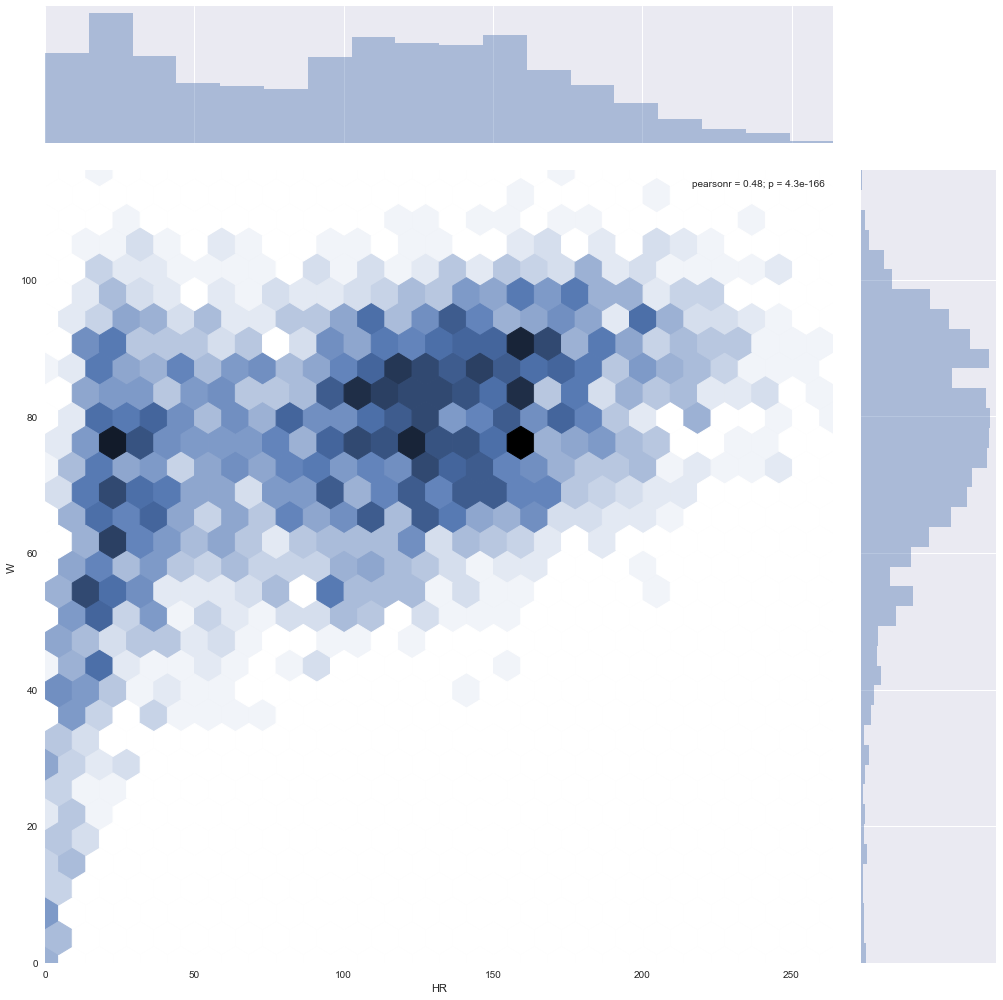

In [28]:
#Create a Hexplot with distributions for both the HR and W columns.
sns.jointplot('HR', 'W', data = teams, kind='hex', size = 14)

#### A few things stand out here. For starters, there is a correlation coefficient of .48, suggesting a moderate postiive correlation between homeruns, and wins. What's more intriguing is how the distributions of both Homeruns and Wins vary. Neither are even close to a normal distribution. 

#### Homeruns for starters appears to be multimodal, Wins is skewed heavily to the right. There could be significant reasons as to why this may be the case. It appears that there is a significant difference in how many homeruns were hit in different eras. 

#### To investigate this, I would like to see box and whisker plots grouped by year for both Wins and Homeruns. I believe this will illustrate the problem with this model created above. I will also include the summary statistics for Wins and Homeruns in each evaluation.

                     
Summary Statistics for Wins over each year since the beginning of baseball history
---------------------


count    2835.000000
mean       74.814109
std        17.591208
min         0.000000
25%        66.000000
50%        77.000000
75%        87.000000
max       116.000000
Name: W, dtype: float64

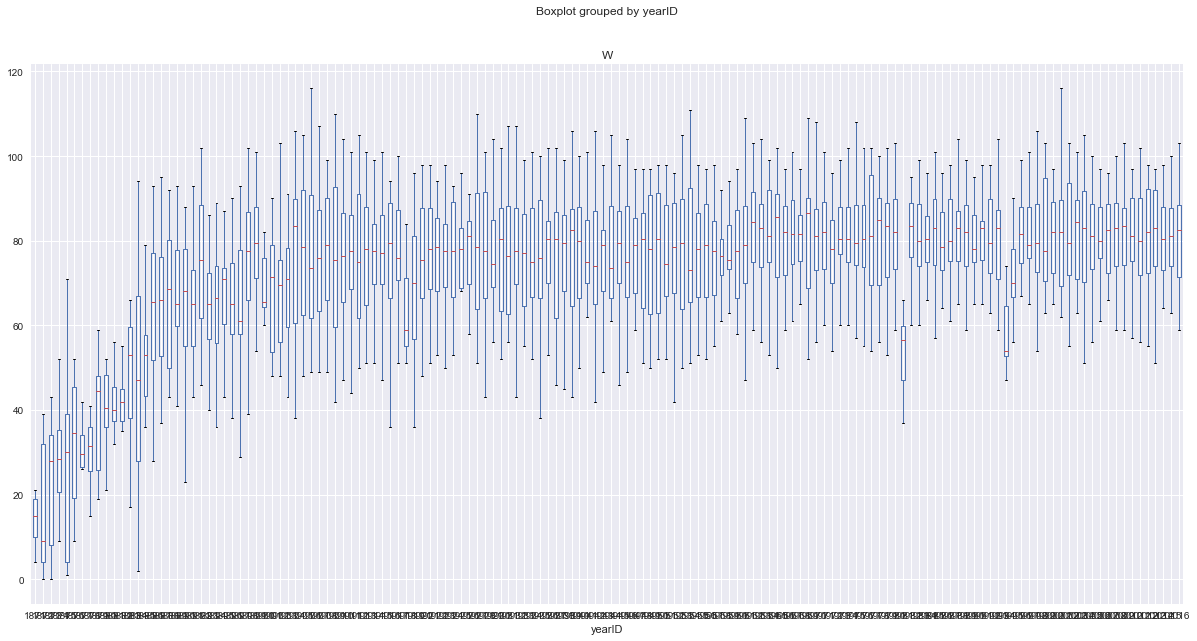

In [29]:
# Making a boxplot for wins, grouped by year.
teams.boxplot(column = 'W', by = 'yearID', figsize=(20,10), grid = True)
print("                     ") # Clean Display
print("Summary Statistics for Wins over each year since the beginning of baseball history") # Clean Display
print("---------------------") # Clean Display
teams['W'].describe() # Summary Statistics for wins

#### First of all the summary statistics: Right away, you can tell the distribution is closer to normal than expected. The mean is only 2.2 below the median, only 13 % of a single standard deviation. If you look at the earlier years of the MLB, there were clearly less games played. After 10-15 seasons, the number of games increased drastically, and since then, barring work stoppage years, the distribution is basically normal.  

                     
Summary Statistics for Homeruns over each year since the beginning of baseball history
---------------------


count    2835.000000
mean      102.045150
std        61.854749
min         0.000000
25%        42.000000
50%       108.000000
75%       150.000000
max       264.000000
Name: HR, dtype: float64

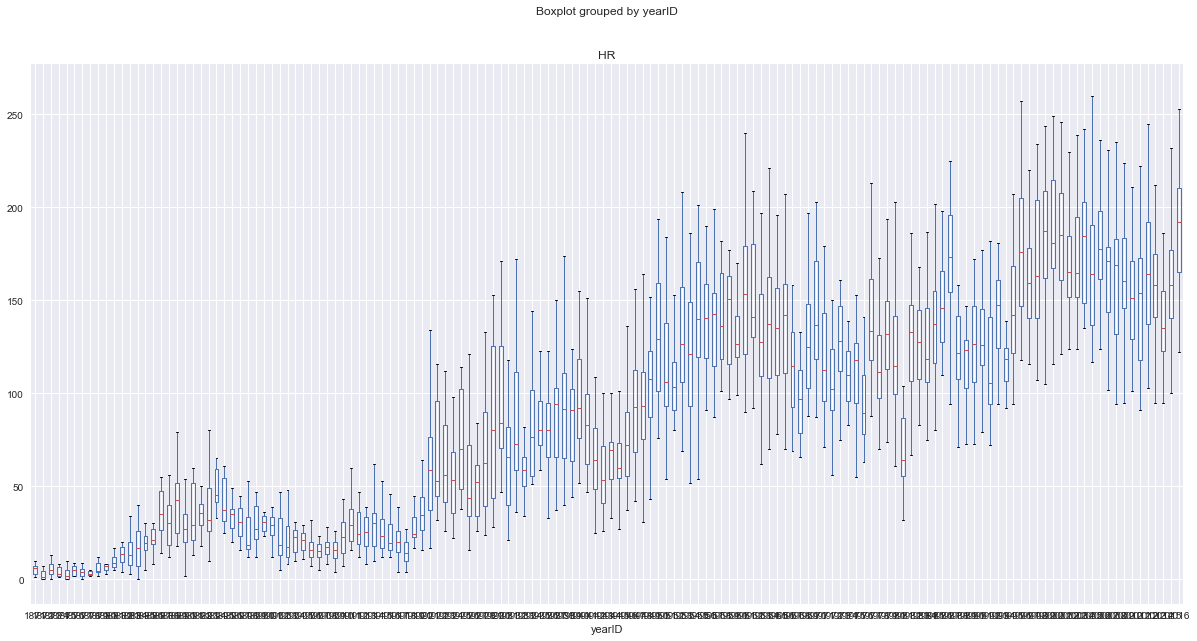

In [30]:
# Create a Boxplot of team homeruns by year. 
teams.boxplot(column = 'HR', by = 'yearID', ax = None, figsize=(20,10))
print("                     ") # Clean Display
print("Summary Statistics for Homeruns over each year since the beginning of baseball history") # Clean Display
print("---------------------") # Clean Display
teams['HR'].describe() # Summary Statistics for Homeruns

#### Homeruns are an entirely different story. Comparing the Mean to the median, they are close, but there is tremendous variation from year to year as shown above. A lot of the earlier years really didn't have much variation in homeruns by team per season at all. Interestingly enough, you can see a positive slope in the data. 

## Question 3 Answer - Since the beginning of baseball history, does a team's ability to hit homeruns translate into victories?

#### This answer is tricky. It appears based on our correlation that there is a relationship between a team's homeruns and wins per season... but the question as posed provides us with too broad of a range to evaluate this information. Additionally, while Pearson's correlation does confirm a positive linear relationship between the data, more digging and fine tuning would need to be done to evaluate the statistical significance of the relationship between both homeruns per season, and wins per season.

***

# Wrap-Up

### Exploring Baseball is a tremendous undertaking. We've looked at how a players batting average, and on base percentage can impact and change the outcomes of games. We've investigated historical results of players success, and found challenging, and overwhelming information that suggest further investigation is needed. One thing is for certain. None of the inferences made, or the theory's discussed have been proven, disproven, or even supported statistically speaking. This is just one of the beginning steps into determining exactly what it is that makes a team a winning team. Is it the players? Is it the team's combined efforts? Where should teams focus on the most? Hits? Homeruns? Getting on Base? None of this has been fully answered today. 

### What has been accomplished however, is an intriguing desire to learn more. I hope you have more questions now than when you started to read this. If you have... then we have accomplished our task. 

## References

- <a href = http://www.seanlahman.com/baseball-archive/statistics/>Laman's Baseball Database</a>
- <a href = http://mlb.com>Major League Baseball</a>
- <a href = https://en.wikipedia.org/wiki/Baseball_statistics>Baseball Statistics Wikipedia</a>
- <a href = https://stackoverflow.com/>Stack Overflow</a>